In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import matplotlib.image as mpimg

# Section 1: Demographic Visuals

### Function

In [302]:
def demographic_visuals(county_data, county_name):
    '''
    county_data eg, s1_san_mateo_data
    county_name eg, 'San Mateo County'
    '''
    # Data Cleaning
    financial_data = county_data.copy()
    financial_data.set_index('Demographic Indicators', inplace=True)
    financial_data = financial_data.loc[['Average Median Income *(2023)', 'Average Expense ADA'], :]
    financial_data = financial_data.replace(r'[$,]', '', regex=True).astype(float)

    students_demographic = county_data.copy()
    students_demographic = students_demographic[students_demographic['Demographic Indicators'].str.startswith('%')]
    students_demographic.set_index('Demographic Indicators', inplace=True)
    students_demographic.loc['% Students Receiving Special Education', students_demographic.columns[0]] = students_demographic.loc['% Students Receiving Special Education', students_demographic.columns[0]].split(' ')[0]
    students_demographic.loc['% Students Receiving Special Education', students_demographic.columns[1]] = students_demographic.loc['% Students Receiving Special Education', students_demographic.columns[1]].split(' ')[0]    
    students_demographic.iloc[:, 0] = students_demographic.iloc[:, 0].str.rstrip('%').astype(float)
    students_demographic.iloc[:, 1] = students_demographic.iloc[:, 1].str.rstrip('%').astype(float)

    numeric_data = county_data.copy()
    numeric_data.set_index('Demographic Indicators', inplace=True)
    numeric_data = numeric_data.loc[['Total Student Enrollment', 'Total # of School Districts', 'Average Pollution Burden Percentile'], :]
    numeric_data.loc['Average Pollution Burden Percentile'] = numeric_data.loc['Average Pollution Burden Percentile'].str.rstrip('%ile').astype(float)
    numeric_data = numeric_data.replace(r'[,]', '', regex=True).astype(float)



    # Create the graphs
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(13, 14))  

    plt.rcParams['font.family'] = 'DejaVu Sans'

    # Financial data:
    ax1 = financial_data.plot(kind='barh', ax=axes[0], color=['r', 'gold'], alpha=0.8)
    ax1.set_ylabel('', size=15)
    ax1.set_yticklabels(ax1.get_yticklabels(), size=14, ha='right')
    ax1.set_xlabel('$', size=15)
    ax1.set_title('Financial Data: ' + county_name + ' vs. State of California', size=20, pad=20)
    ax1.legend(labels=[county_name, 'California'], bbox_to_anchor=(1.35, 0.95), loc='upper right')

    for i in ax1.patches:
        ax1.text(i.get_width() + 0.5, i.get_y() + i.get_height() / 2, '$' + str(i.get_width()), va='center', fontsize=10)

    # Students demographic:
    ax2 = students_demographic.plot(kind='barh', ax=axes[1], color=['r', 'gold'], alpha=0.7)
    ax2.set_ylabel('', size=15)
    ax2.set_yticklabels(ax2.get_yticklabels(), size=12, ha='right')
    ax2.set_xlabel('Percentage %', size=15)
    ax2.set_xticks(range(0, 101, 10))
    ax2.set_xlim(0, 100)
    ax2.set_title('Demographic Indicators: ' + county_name + ' vs. State of California', size=20, pad=20)
    ax2.legend(labels=[county_name, 'California'], bbox_to_anchor=(1.35, 0.95), loc='upper right')

    for i in ax2.patches:
        ax2.text(i.get_width() + 0.5, i.get_y() + i.get_height() / 2, str(i.get_width()) + '%', va='center', fontsize=10)

    # Pollution Burden:
    ax3 = numeric_data.loc[['Average Pollution Burden Percentile'], :].plot(kind='barh', ax=axes[2], color=['r', 'gold'], alpha=0.7)
    ax3.set_xlabel('Percentile', size=15)
    ax3.set_xticks(range(0, 101, 10))
    ax3.set_xlim(0, 100)
    ax3.set_yticks([])
    ax3.set_ylabel('Pollution Burden', size=15)
    ax3.set_title('Pollution Burden: ' + county_name + ' vs. State of California', size=20, pad=20)
    ax3.legend(labels=[county_name, 'California'], bbox_to_anchor=(1.35, 0.95), loc='upper right')

    for i in ax3.patches:
        ax3.text(i.get_width() + 0.5, i.get_y() + i.get_height() / 2, str(i.get_width()) + 'th', va='center', fontsize=10)

    # Common settings for all subplots
    for ax in [ax1, ax2, ax3]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    # Adjust spacing between subplots
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.8)

    plt.savefig('Section 1 Outputs/' + county_name + ' Demographic Visuals.png', bbox_inches='tight')
    plt.show()


### San Mateo County

In [290]:
# Read in the data
s1_san_mateo_data = pd.read_csv("Section 1 Data/County Data - San Mateo Section 1.csv")
s1_san_mateo_data.info()
s1_san_mateo_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Demographic Indicators      10 non-null     object
 1   San Mateo County (2021-22)  10 non-null     object
 2   State
(2021-22)             10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


,Demographic Indicators,San Mateo County (2021-22),State\n(2021-22)
0,Total Student Enrollment,"86,422","5,892,240"
1,Total # of School Districts,26,939
2,Average Median Income *(2023),"$136,837","$84,097"
3,Average Expense ADA,"$23,107","$18,827"
4,% Unduplicated Students,34.42%,55.73%
5,% Students Eligible Free or Reduced Lunch (FRL),30.60%,57.80%
6,% English Language Learner Students (ELL),21.30%,19.10%
7,% Students of Color,73.40%,78.90%
8,% Students Receiving Special Education,1.37 *(2018),13.8% *(2023)
9,Average Pollution Burden Percentile,35.6%ile,50%ile


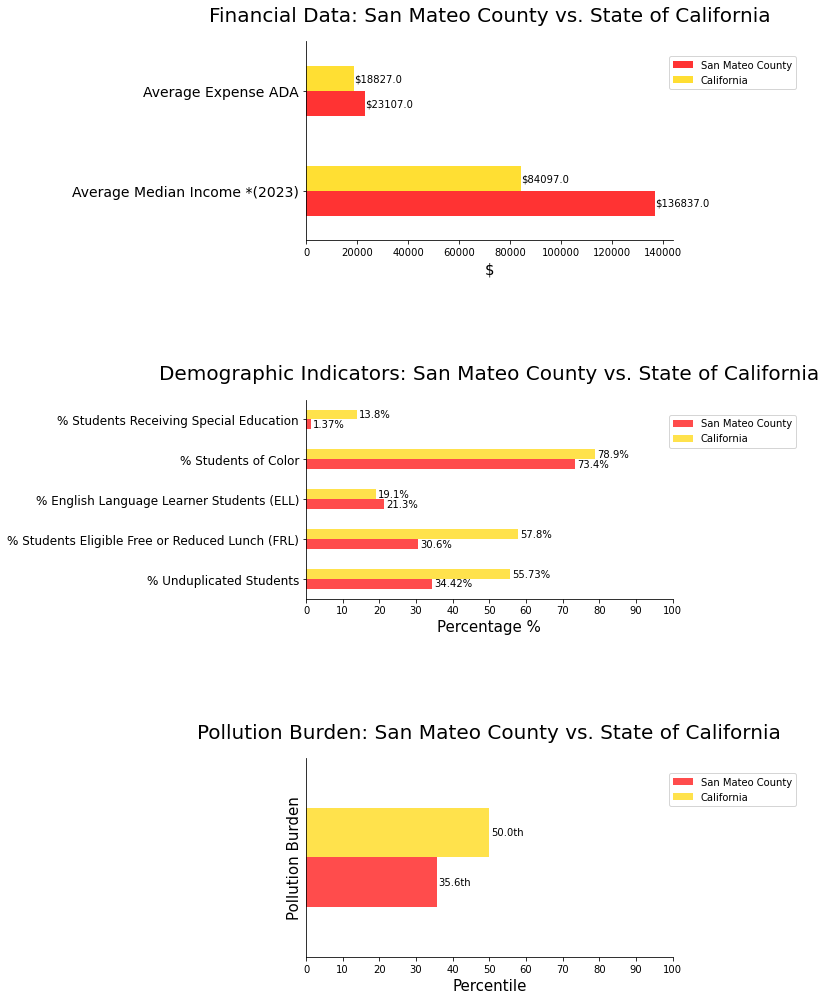

In [303]:
demographic_visuals(s1_san_mateo_data, 'San Mateo County')

### San Francisco County

In [292]:
# Read in the data
s1_san_francisco_data = pd.read_csv("Section 1 Data/County Data - San Francisco Section 1.csv")
s1_san_francisco_data.info()
s1_san_francisco_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Demographic Indicators          10 non-null     object
 1   San Francisco County (2021-22)  10 non-null     object
 2   State
(2021-22)                 10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


,Demographic Indicators,San Francisco County (2021-22),State\n(2021-22)
0,Total Student Enrollment,"56,379","5,892,240"
1,Total # of School Districts,9,939
2,Average Median Income *(2023),"$126,187","$84,097"
3,Average Expense ADA,"$29,258","$18,827"
4,% Unduplicated Students,51.78%,55.73%
5,% Students Eligible Free or Reduced Lunch (FRL),50.50%,57.80%
6,% English Language Learner Students (ELL),26.20%,19.10%
7,% Students of Color,80.30%,78.90%
8,% Students Receiving Special Education,0.94% *(2018),13.8% *(2023)
9,Average Pollution Burden Percentile,36%ile,50%ile


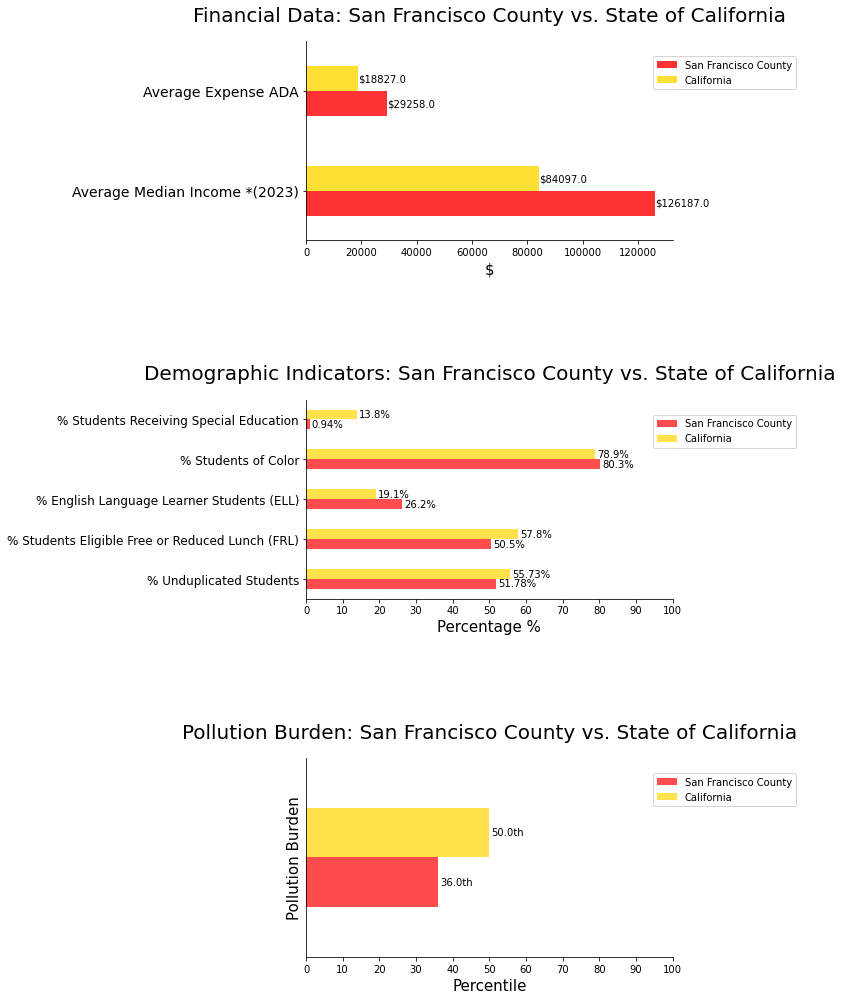

In [293]:
demographic_visuals(s1_san_francisco_data, 'San Francisco County')

### San Joaquin County

In [294]:
# Read in the data
s1_san_joaquin_data = pd.read_csv("Section 1 Data/County Data - San Joaquin Section 1.csv")
s1_san_joaquin_data.info()
s1_san_joaquin_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Demographic Indicators           10 non-null     object
 1   San Joaquin County 
(2021-2022)  10 non-null     object
 2   State Average
(2021-2022)        10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


,Demographic Indicators,San Joaquin County \n(2021-2022),State Average\n(2021-2022)
0,Total Student Enrollment,"152,384","5,892,240"
1,Total # of School Districts,19,939
2,Average Median Income *(2023),"$74,962","$84,097"
3,Average Expense ADA,"$31,481","$18,827"
4,% Unduplicated Students,55.44%,55.73%
5,% Students Eligible Free or Reduced Lunch (FRL),59.20%,57.80%
6,% English Language Learner Students (ELL),20.30%,19.10%
7,% Students of Color,82.70%,78.90%
8,% Students Receiving Special Education,2.3% *(2018),13.8% *(2023)
9,Average Pollution Burden Percentile,58.2%ile,50%ile


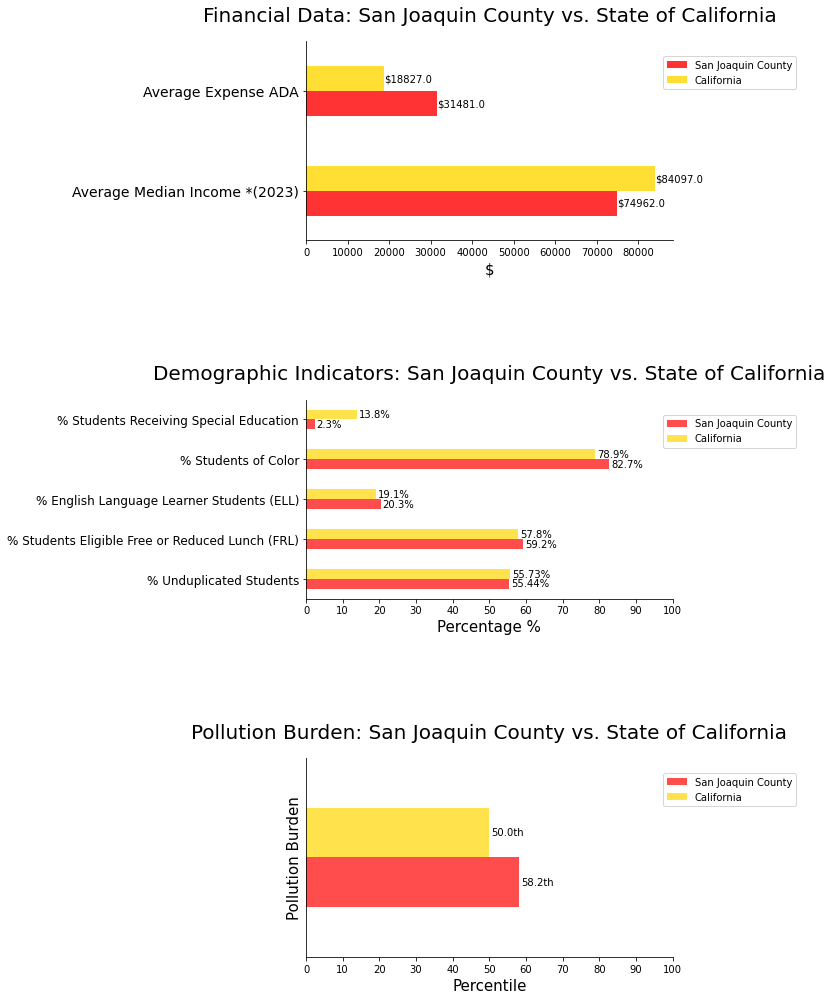

In [295]:
demographic_visuals(s1_san_joaquin_data, 'San Joaquin County')

### Solano County

In [296]:
# Read in the data
s1_solano_data = pd.read_csv("Section 1 Data/County Data - Solano Section 1.csv")
s1_solano_data.info()
s1_solano_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Demographic Indicators   10 non-null     object
 1   Solano County (2021-22)  10 non-null     object
 2   State
(2021-22)          10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


,Demographic Indicators,Solano County (2021-22),State\n(2021-22)
0,Total Student Enrollment,"60,492","5,892,240"
1,Total # of School Districts,8,939
2,Average Median Income *(2023),"$89,648","$84,097"
3,Average Expense ADA,"$15,610","$18,827"
4,% Unduplicated Students,48.61%,55.73%
5,% Students Eligible Free or Reduced Lunch (FRL),45.20%,57.80%
6,% English Language Learner Students (ELL),13.30%,19.10%
7,% Students of Color,76.50%,78.90%
8,% Students Receiving Special Education,.98% *(2018),13.8% *(2023)
9,Average Pollution Burden Percentile,31.1%ile,50%ile


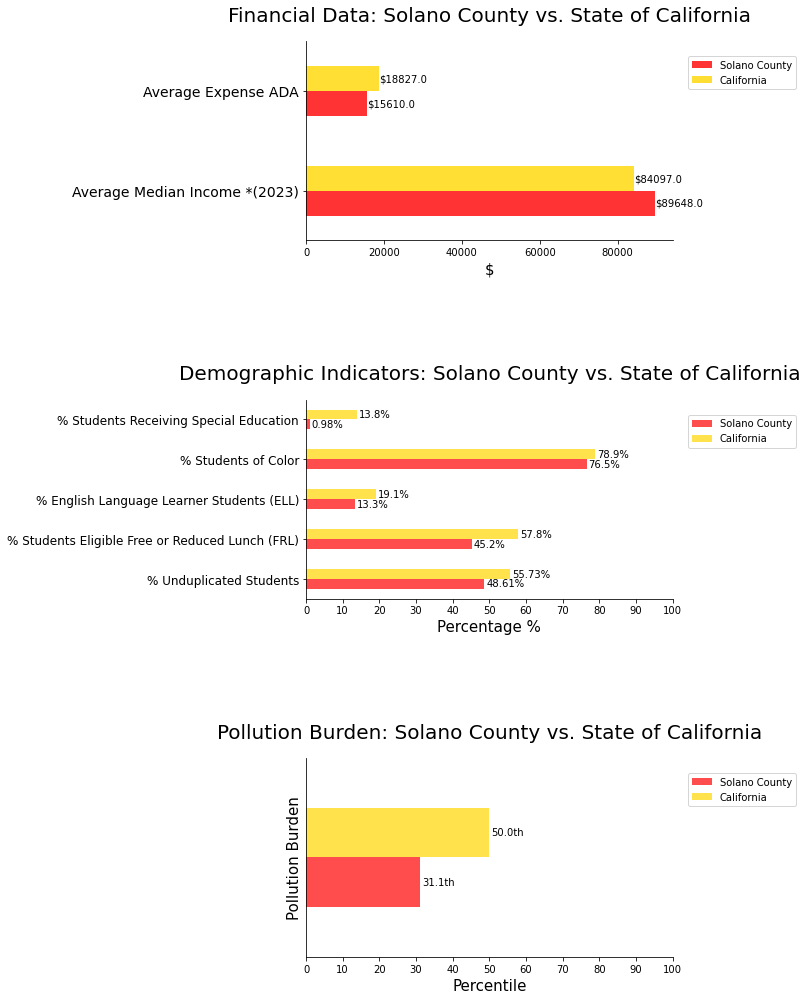

In [297]:
demographic_visuals(s1_solano_data, 'Solano County')

### San Diego County

In [298]:
# Read in the data
s1_san_diego_data = pd.read_csv("Section 1 Data/County Data - San Diego Section 1.csv")
s1_san_diego_data.info()
s1_san_diego_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Demographic Indicators  10 non-null     object
 1   XXX County (2021-22)    10 non-null     object
 2   State
(2021-22)         10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


,Demographic Indicators,XXX County (2021-22),State\n(2021-22)
0,Total Student Enrollment,"481,102","5,892,240"
1,Total # of School Districts,53,939
2,Average Median Income *(2023),"$88,240","$84,097"
3,Average Expense ADA,"$24,411","$18,827"
4,% Unduplicated Students,45.15%,55.73%
5,% Students Eligible Free or Reduced Lunch (FRL),48.70%,57.80%
6,% English Language Learner Students (ELL),18.80%,19.10%
7,% Students of Color,70%,78.90%
8,% Students Receiving Special Education,8.2% *(2018),13.8% *(2023)
9,Average Pollution Burden Percentile,37.8%ile,50%ile


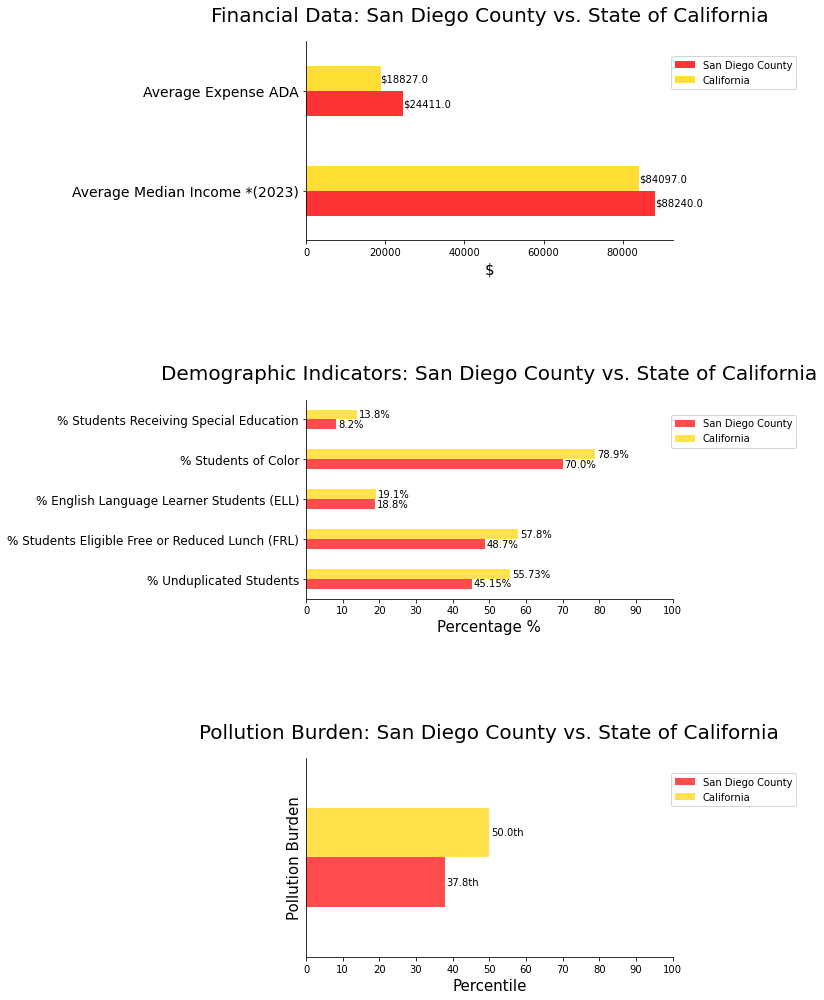

In [299]:
demographic_visuals(s1_san_diego_data, 'San Diego County')

### Orange County

In [300]:
# Read in the data
s1_orange_data = pd.read_csv("Section 1 Data/County Data - Orange Section 1.csv")
s1_orange_data.info()
s1_orange_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Demographic Indicators   10 non-null     object
 1   Orange County (2021-22)  10 non-null     object
 2   State
(2021-22)          10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


,Demographic Indicators,Orange County (2021-22),State\n(2021-22)
0,Total Student Enrollment,"448,729","5,892,240"
1,Total # of School Districts,33,939
2,Average Median Income *(2023),"$100,485","$84,097"
3,Average Expense ADA,"$17,699","$18,827"
4,% Unduplicated Students,51.13%,55.73%
5,% Students Eligible Free or Reduced Lunch (FRL),46.50%,57.80%
6,% English Language Learner Students (ELL),21.40%,19.10%
7,% Students of Color,75.30%,78.90%
8,% Students Receiving Special Education,7.2% *(2018),13.8% *(2023)
9,Average Pollution Burden Percentile,57.4%ile,50%ile


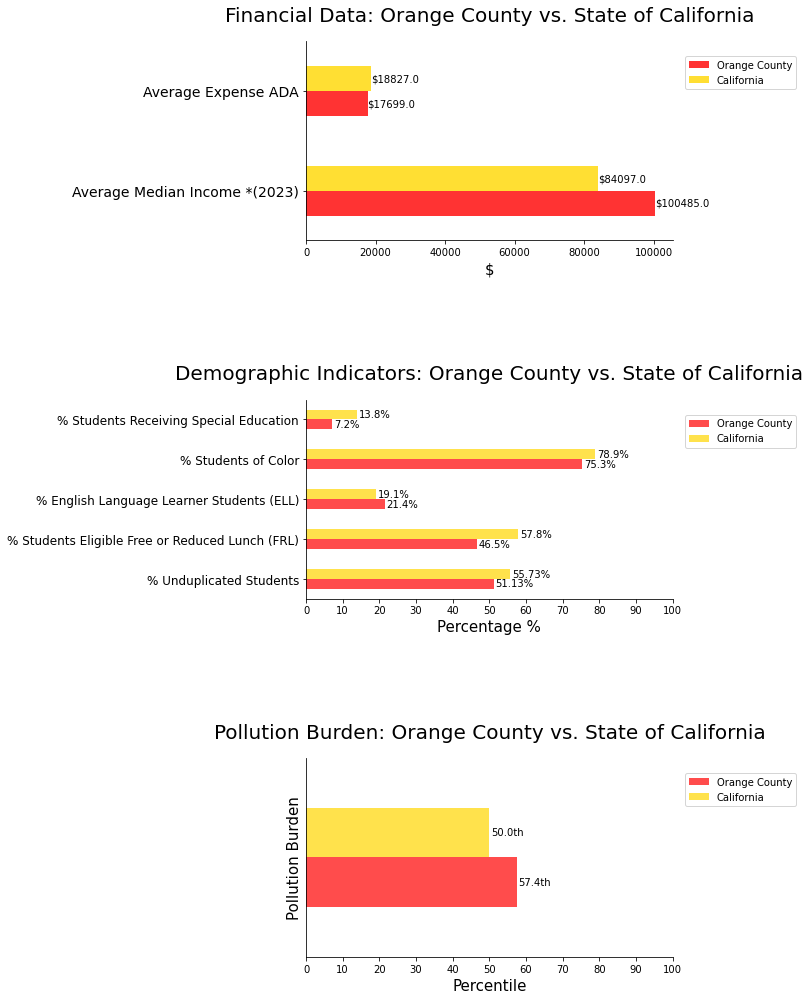

In [301]:
demographic_visuals(s1_orange_data, 'Orange County')

### Santa Cruz 

In [304]:
# Read in the data
s1_santa_cruz_data = pd.read_csv("Section 1 Data/County Data - Santa Cruz Section 1.csv")
s1_santa_cruz_data.info()
s1_santa_cruz_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Demographic Indicators         10 non-null     object
 1   Santa Cruz County
(2021-2022)  10 non-null     object
 2   State Average
(2021-2022)      10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


,Demographic Indicators,Santa Cruz County\n(2021-2022),State Average\n(2021-2022)
0,Total Student Enrollment,"38,895","5,892,240"
1,Total # of School Districts,14,939
2,Average Median Income *(2023),"$96,093","$84,097"
3,Average Expense ADA,"$17,980","$18,827"
4,% Unduplicated Students,47.93%,55.73 %
5,% Students Eligible Free or Reduced Lunch (FRL),52.20%,57.8 %
6,% English Language Learner Students (ELL),23.90%,19.1 %
7,% Students of Color,65.10%,78.90%
8,% Students Receiving Special Education,.7% *(2018),13.8% *(2023)
9,Average Pollution Burden Percentile,30.8%ile,50%ile


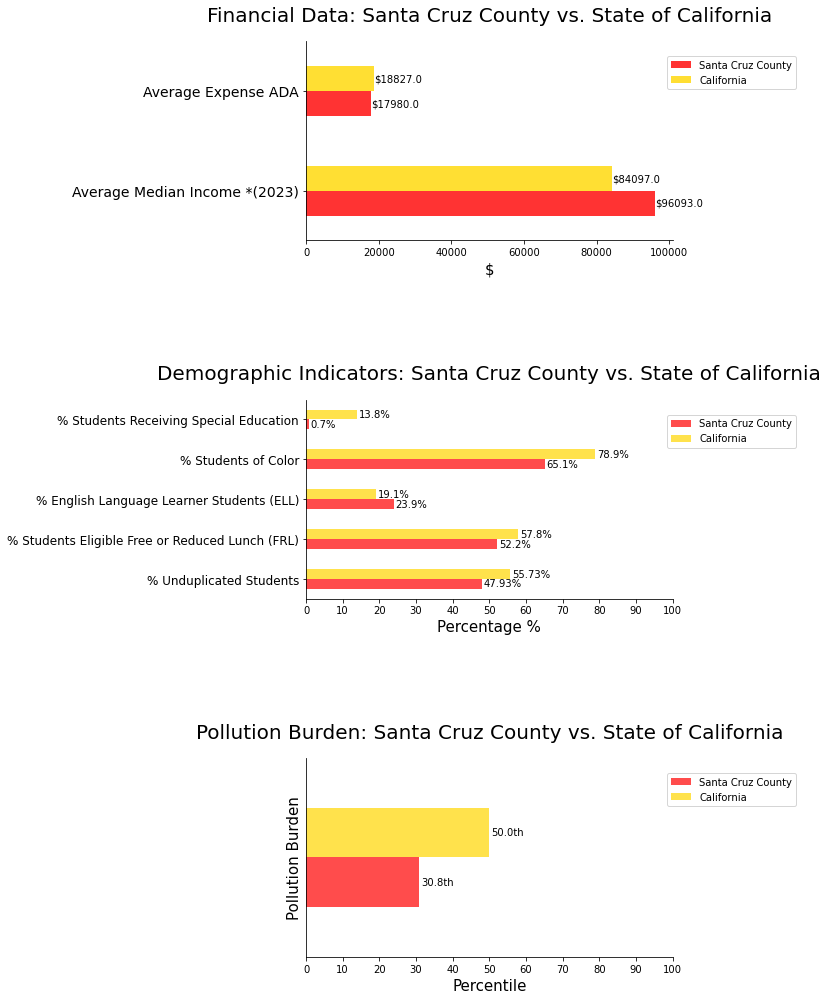

In [305]:
demographic_visuals(s1_santa_cruz_data, 'Santa Cruz County')